In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

In [4]:
from HyperParameterTuning import *

optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

Using model=StepWiseVAEMLP
encode=[2049, 691, 42]=1,445,614, decode=[1067, 1037, 1024]=2,170,428, total=3,616,042
VAE_layers=[4788, 2037, 888, 6]
StepWiseMLPAutoEncoder compression: 24.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=691, bias=True)
    (1): ReLU()
    (2): Linear(in_features=691, out_features=42, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1067, out_features=1037, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1037, out_features=1024, bias=True)
  )
)

VAE_layers=[4788, 2037, 888, 6]
VariationalAutoEncoder compression: 798.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4788, out_features=2037, bias=True)
    (1): Linear(in_features=2037, out_features=888, bias=True)
  )
  (fc_mu): Linear(in_features=888, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=888, out_features=6, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=6, out_features=888, bias=True)
    (1): Linear(in_features=888, out_features=2037, bias=True)
    (2): Linear(in_features=2037, out_features=4788, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=26,756,584 parameters, exact=26,766,700, error=-0.04%
model=StepWiseVAEMLPAutoEncoder(
  (stepwise): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=2049, out_features=691, bias=True)
      (1): ReLU()
      (2): Linear(in_features=691, out_features=42, bias=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=1067, out_features=1037, bias=True)
      (1): ReLU()
      (2): Linear(in_features=1037, out_features=1024, bias=True)
    )
  )
  (vae): VariationalAutoEncoder(
    (encoder_layers): ModuleList(
      (0): Linear(in_features=4788, out_features=2037, bias=True)
      (1): Linear(in_features=2037, out_features=888, bias=True)
    )
    (fc_mu): Linear(in_features=888, out_features=6, bias=True)
    (fc_logvar): Linear(in_features=888, out_features=6, bias=True)
    (decoder_layers): ModuleList(
      (0): Linear(in_features=6, out_features=888, bias=True)
      (1): Linear(in_features=888, out_feat

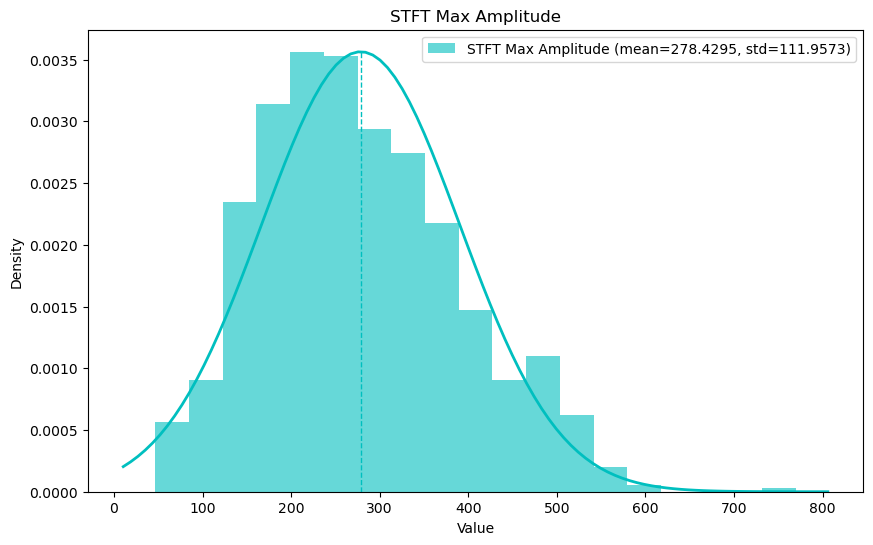

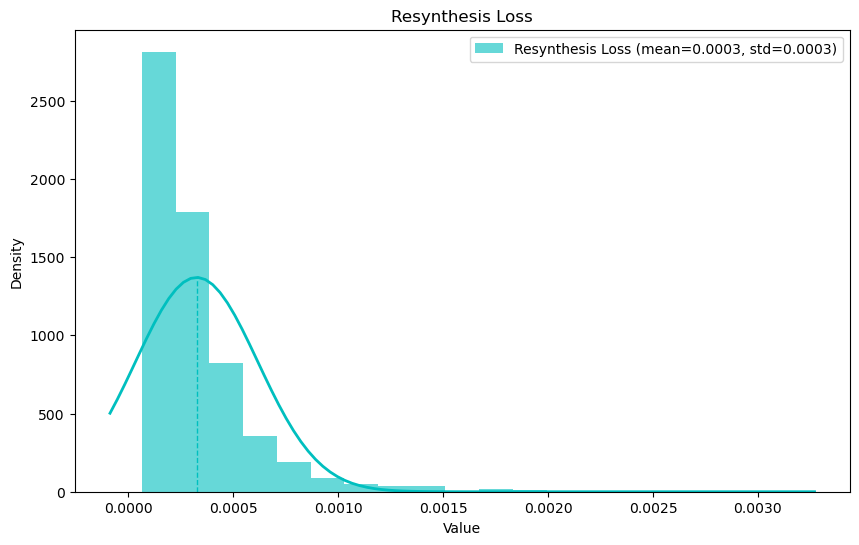

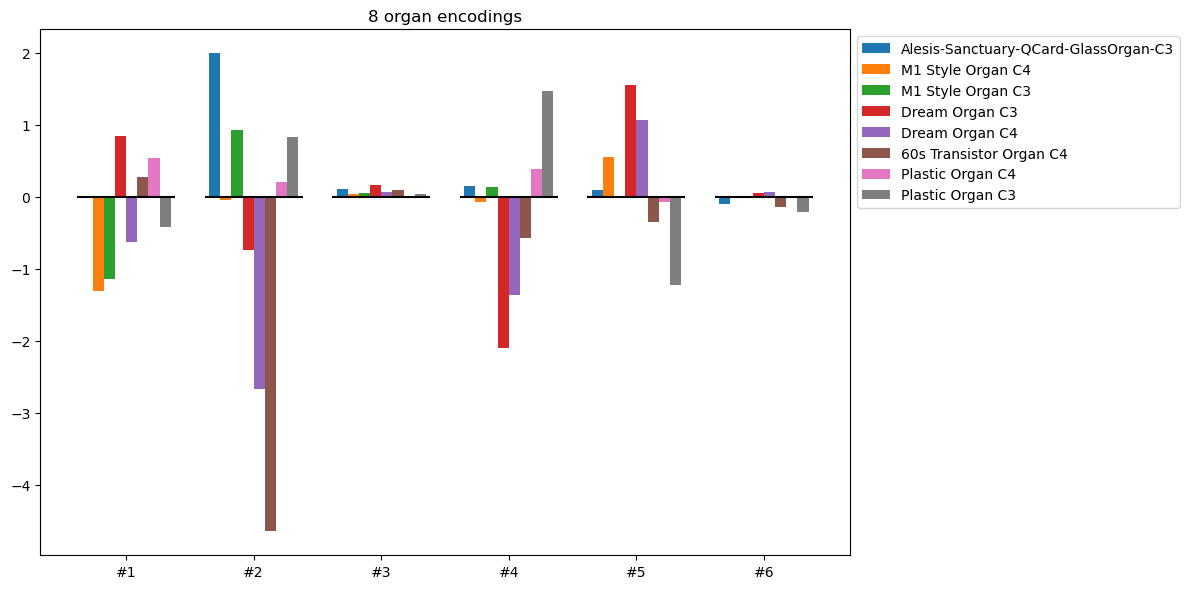

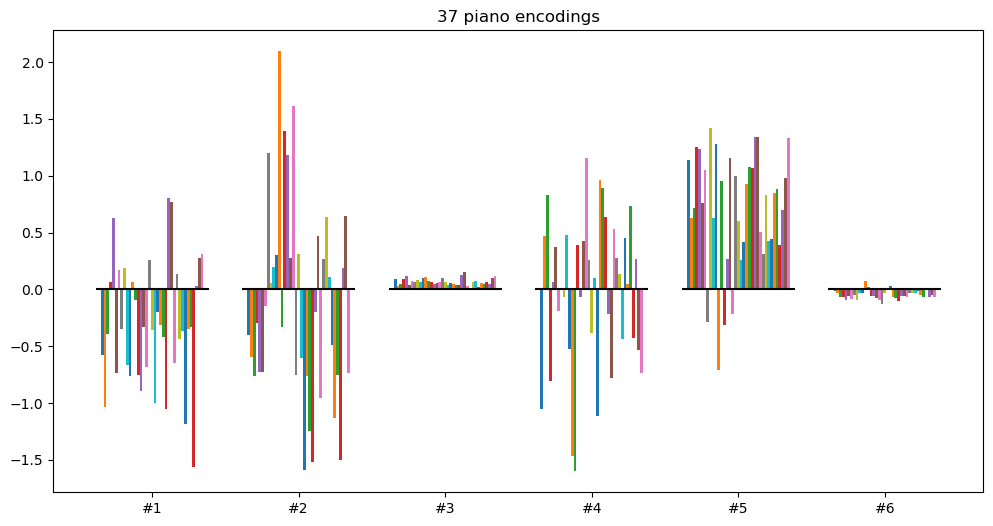

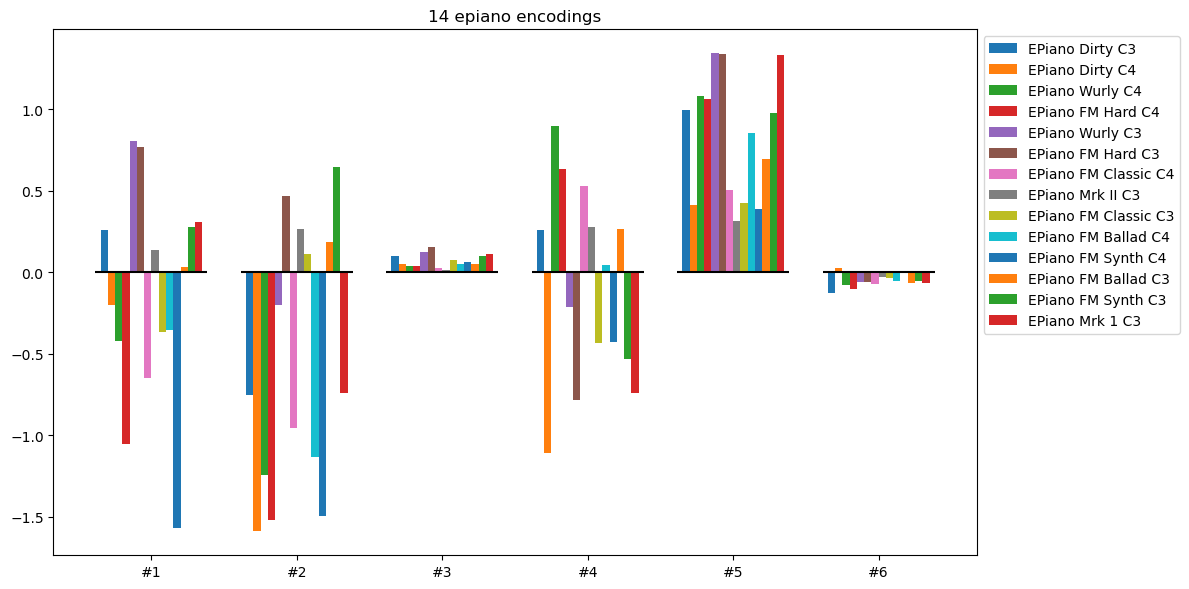

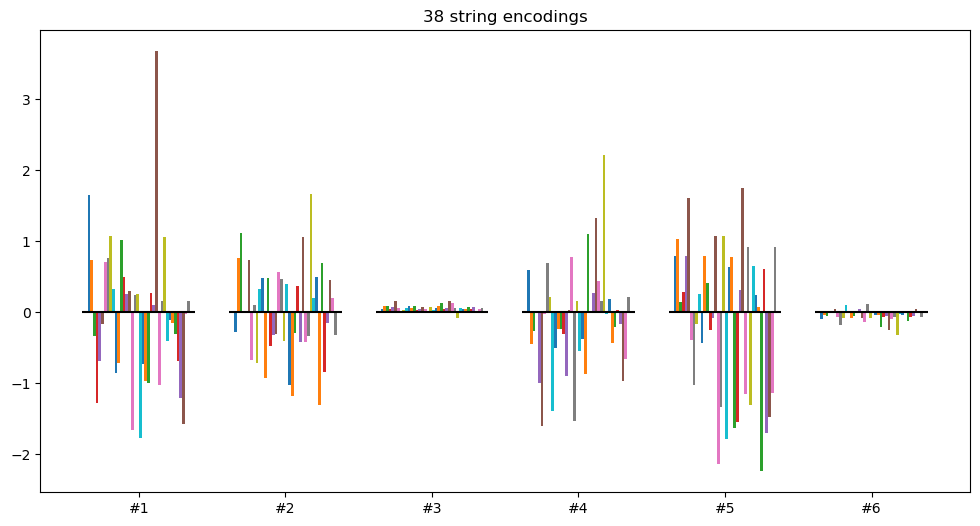

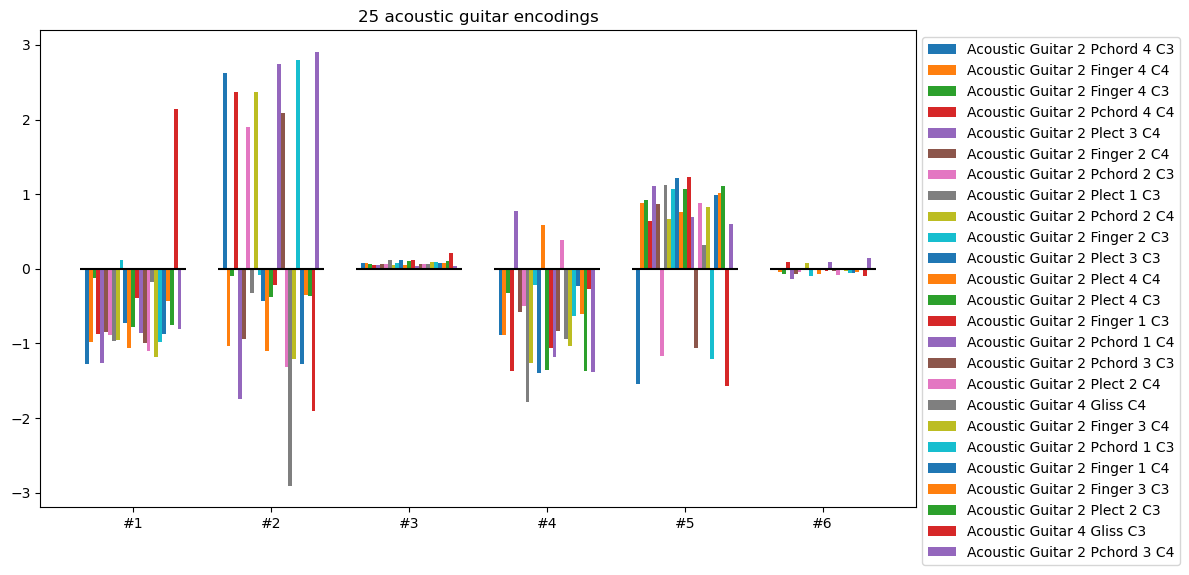

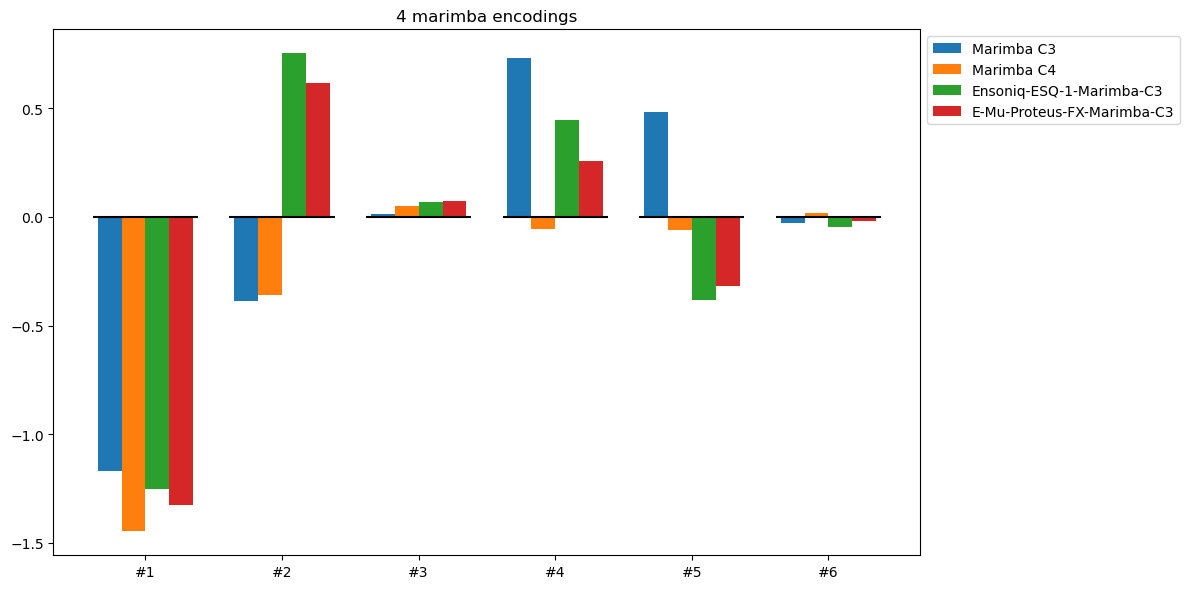

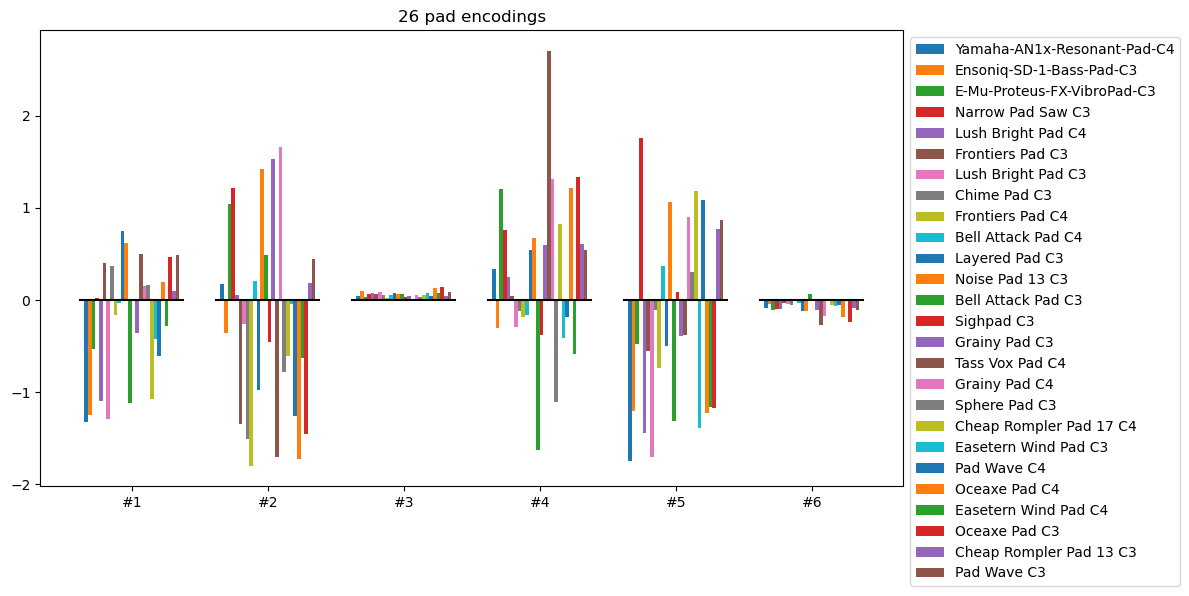

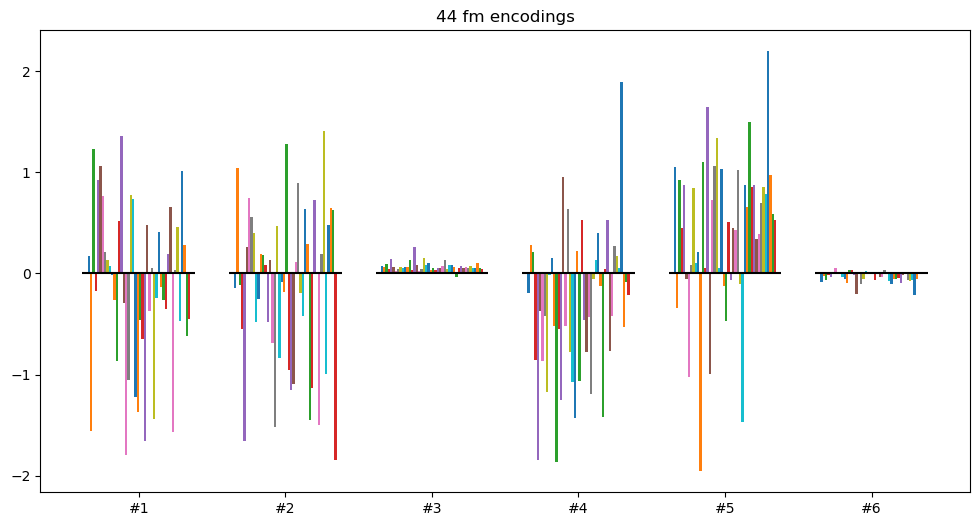

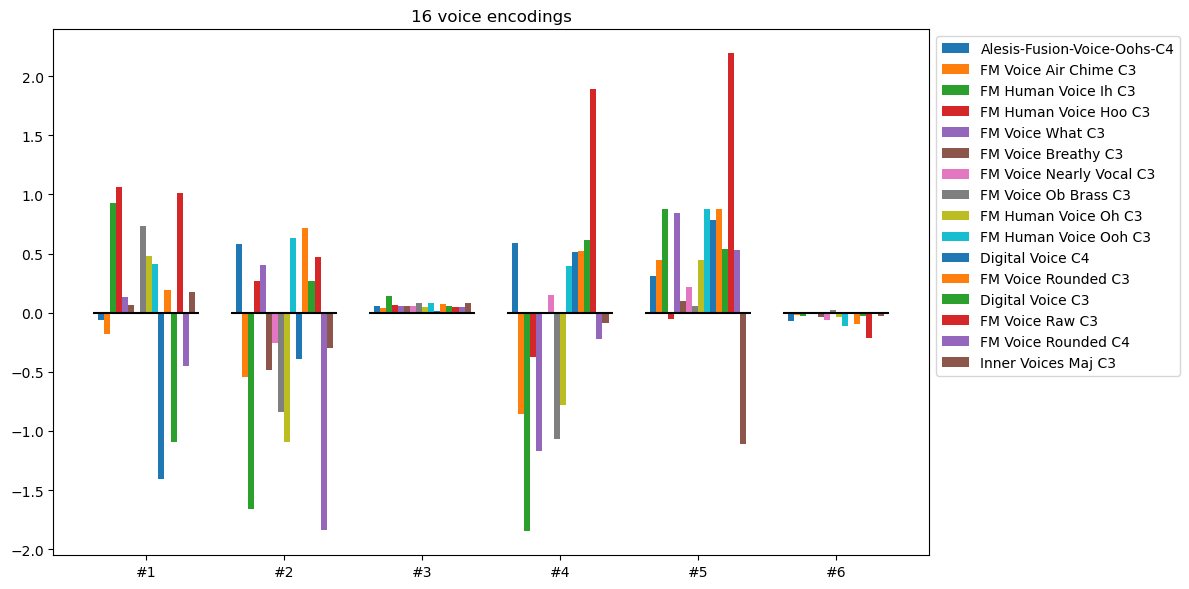

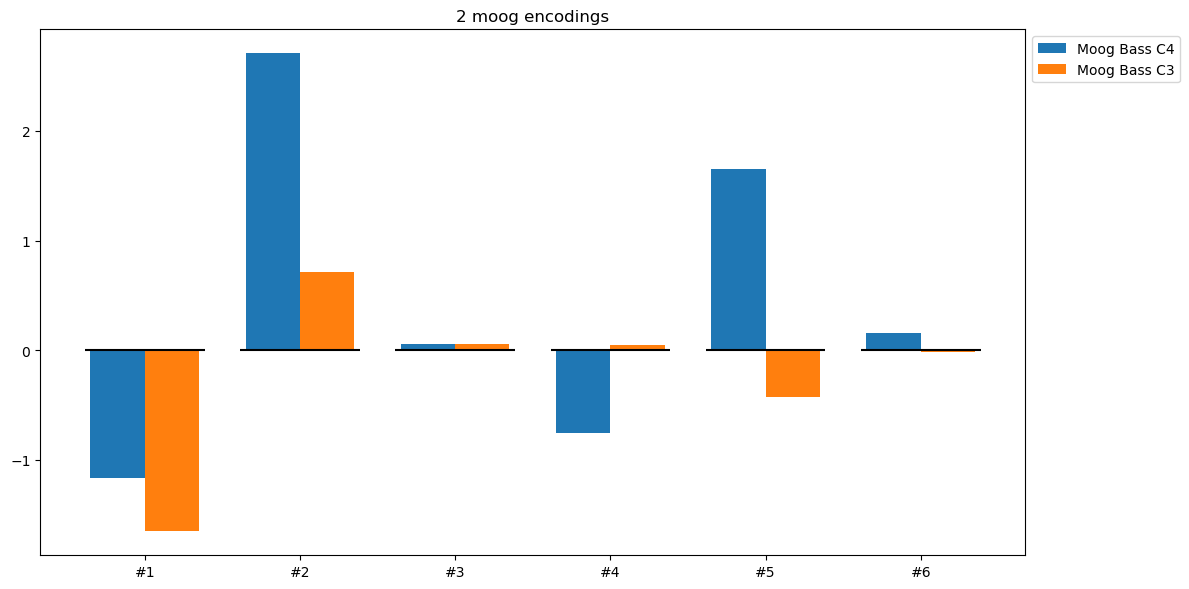

In [ ]:
# Generate some new samples, either by interpolation or randome perturbation
from Generate import *

# Test every sample and measure the error.
#test_all()

#generate_morphs()

#generate_variations()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
#plot_encodings()

# Generate samples from each variable
#generate_main_encodings()